## Paired T-test (대응표본에 의한 두 모평균 비교)

In [2]:
# Example 6.3 -1
import pandas as pd

data_path = "./data/Paired.csv"
paired_data =  pd.read_csv(data_path)

print(paired_data)
print(type(paired_data))

    ID  Pretest  Posttest
0    1       80        82
1    2       73        71
2    3       70        95
3    4       60        69
4    5       88       100
5    6       84        71
6    7       65        75
7    8       37        60
8    9       91        95
9   10       98        99
10  11       52        65
11  12       78        83
12  13       40        60
13  14       79        86
14  15       59        62
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

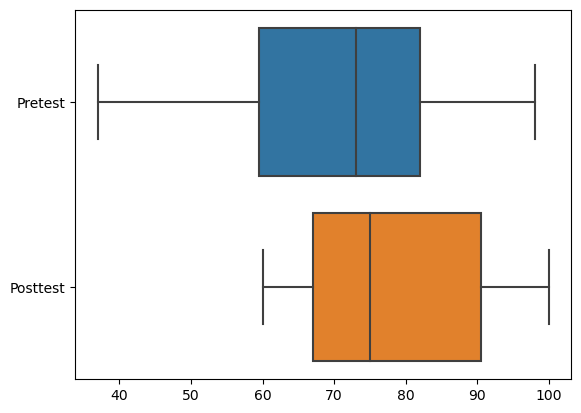

In [4]:
import seaborn as sns

sns.boxplot(data=paired_data.iloc[:, 1:], orient='h')
# 대립가설: 두 집단의 평균이 다르다. or Posttest의 평균이 Pretest의 평균보다 크다.

In [6]:
paired_data["Diff"] = paired_data.Pretest - paired_data.Posttest
paired_data.Diff.describe()

count    15.000000
mean     -7.933333
std       9.931671
min     -25.000000
25%     -12.500000
50%      -7.000000
75%      -2.500000
max      13.000000
Name: Diff, dtype: float64

In [9]:
# 양측검정
from scipy.stats import ttest_rel

print(ttest_rel(paired_data.Pretest, paired_data.Posttest))

Ttest_relResult(statistic=-3.093705670004429, pvalue=0.007930923229026533)


In [8]:
# 단측검정

stat, pval = ttest_rel(paired_data.Pretest, paired_data.Posttest)
print(f"one-sided p-value = {pval/2}")

one-sided p-value = 0.003965461614513267


---

## 독립표본의 두 모비율 비교

In [12]:
import pandas as pd

data_path = "./data/Support.csv"
support_data = pd.read_csv(data_path)
support_data

,ID,Gender,YesNo
0,1,Male,No
1,2,Female,Yes
2,3,Female,No
3,4,Female,No
4,5,Female,No
...,...,...,...
445,446,Male,No
446,447,Male,No
447,448,Female,Yes
448,449,Male,No


In [27]:
support_table = pd.crosstab(
    index=support_data["Gender"],
    columns=support_data["YesNo"],
    # normalize='index'
    )

print(support_table)

# p1_hat = 0.52
# p2_hat = 0.44
# 대립가설: 남자가 여자보다 지지율이 높다.

YesNo    No  Yes
Gender          
Female   96  104
Male    140  110


#### Exact-test (정확검정)

In [32]:
from scipy.stats import fisher_exact

t_stat, p_value = fisher_exact(support_table, alternative="two-sided")
print(f"p-value: {p_value}, t-stat: {t_stat}")

p-value: 0.10634531219761142, t-stat: 0.7252747252747253


#### 카이제곱검정

In [37]:
from scipy.stats import chi2_contingency

# print(chi2_contingency(support_table))

chi2_stat, p_value, dof, expected = chi2_contingency(support_table)
print(f"p-value: {p_value}, chi2-stat: {chi2_stat}, dof: {dof}\n expected: {expected}")

p-value: 0.1110289428837834, chi2-stat: 2.5395141968952935, dof: 1
 expected: [[104.88888889  95.11111111]
 [131.11111111 118.88888889]]


In [43]:
# load data
prepost = pd.read_csv("./data/Prepost.csv")
# create crosstab
prepost_table = pd.crosstab(
    index=prepost["Pre"],
    columns=prepost["Post"],
    margins=True,
    margins_name="Total"
)

prepost_table

Post,No,Yes,Total
Pre,,,
No,18,27,45
Yes,8,67,75
Total,26,94,120


In [47]:
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(prepost_table, exact=True))   # 이항분포 사용

pvalue      0.0018782254774123432
statistic   8.0


In [46]:
print(mcnemar(prepost_table, exact=False))  # 카이제곱분포 사용

pvalue      0.0023457869795667934
statistic   9.257142857142858


In [48]:
data_path = "./data/Reading.csv"
reading_data = pd.read_csv(data_path)
reading_data

,ID,Group,Score
0,1,New,75
1,2,New,80
2,3,New,72
3,4,New,77
4,5,New,69
5,6,New,81
6,7,New,71
7,8,New,78
8,9,Old,65
9,10,Old,70


### 모분산의 동질성 검정

In [49]:
import numpy as np
from scipy import stats

new = reading_data[reading_data.Group=="New"]
old = reading_data[reading_data.Group=="Old"]

def F_test(x, y):
    f = np.var(x, ddof=1) / np.var(y, ddof=1)
    
    df1 = x.size -1
    df2 = y.size -1
    
    p = 2*(1-stats.f.cdf(f, df1, df2))
    
    return f, p

F_test(new.Score, old.Score)

(1.1454545454545453, 0.8624138071371461)

In [53]:
stats.bartlett(new.Score, old.Score)    # Bartlett 검정

BartlettResult(statistic=0.030098911091236386, pvalue=0.8622659908256447)